<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/Content/Data_Visualization/29_Uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uncertainty

Uncertainty is one of the most important topics in statistics.  Visualizing that uncertainty is very critical to expressing these statistical ideas.  We'll explore several ways to display this crutical concept.

## Waffle Charts

### With Random Chance

In [4]:
import numpy as np


truths = np.random.binomial(1,.25,25)

truths

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

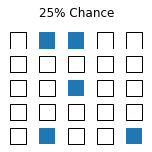

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(5, 5, constrained_layout=True, figsize=(2, 2))


def hatches_plot(ax,h):
    ax.add_patch(Rectangle((0, 0), 1, 1, fill=h))
    ax.axis('equal')
    ax.axis('off')

for ax, h in zip(axs.flat,truths):
    hatches_plot(ax,h)

fig.suptitle('25% Chance')

plt.show()

### With Package

In [3]:
!pip install pywaffle

     |████████████████████████████████| 565 kB 7.0 MB/s 


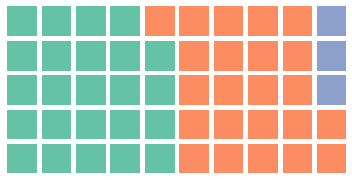

In [7]:
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    columns=10, 
    values=[48, 46, 6],
    figsize=(5, 3)
)
plt.show()

`pywaffle` is actually a pretty cool package for doing this sort of graphic!  For my 25% chance above, I'd do something like:

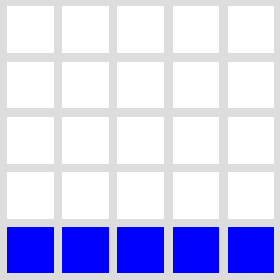

In [15]:
plt.figure(FigureClass = Waffle,
           rows= 5,
           columns = 5,
           values = [5,20],
           colors = ['blue','white'],
           vertical = True,
           facecolor='#DDDDDD' )
plt.show()

The package has lots of options to include some really cool graphics.  Here is how many times I biked versus driving this week.

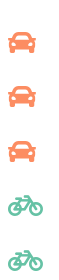

In [17]:
plt.figure(FigureClass=Waffle,
           rows = 5,
           values = [2,3],
           icons = ['bicycle','car'])

plt.show()

## Error Bars for Mean

Perhaps the most fundamental concept in error is the mean.  We know that the mean will be approximately distributed as normal for a large enough sample size with standard deviation $\frac s{\sqrt n}$ where $s$ is the sample standard deviation and $n$ the sample size.  Let's see that visualized in a bar graph.

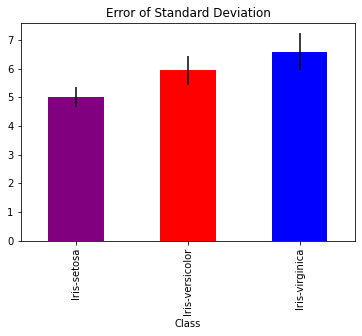

In [ ]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Data_Sets/iris.csv')

dfgrouped = df.groupby('Class').agg(['mean','std', 'count'])

dfgrouped.SepalLength.plot.bar(y = 'mean',yerr = 'std', legend = False, color = ['purple','red', 'blue'], title = "Error of Standard Deviation")

In [ ]:
import numpy as np
from scipy.stats import t

def SE(std,n):
  return std/np.sqrt(n)



dfgroupedSepalLength = dfgrouped.SepalLength

dfgroupedSepalLength['SE'] = dfgroupedSepalLength.apply(lambda x: SE(x['std'],x['count']), axis = 1)


dfgroupedSepalLength.loc[:,'95%'] = dfgroupedSepalLength.loc[:,'SE']*t.ppf(.975,49)

dfgroupedSepalLength


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,mean,std,count,SE,95%
Class,,,,,
Iris-setosa,5.006,0.352490,50,0.049850,0.100176
Iris-versicolor,5.936,0.516171,50,0.072998,0.146694
Iris-virginica,6.588,0.635880,50,0.089927,0.180715


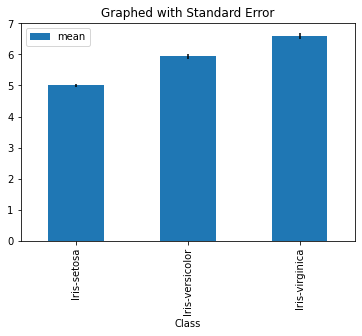

In [ ]:
dfgroupedSepalLength.plot.bar(y = 'mean',yerr = 'SE', title = 'Graphed with Standard Error' )

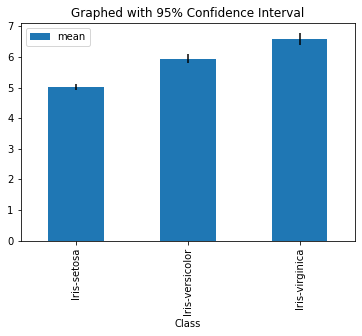

In [ ]:
dfgroupedSepalLength.plot.bar(y = 'mean',yerr = '95%', title = 'Graphed with 95% Confidence Interval' )

## Confidence Interval for Regression

It is automatically generated with `seaborn`.  It is computed with a bootstrap(!).

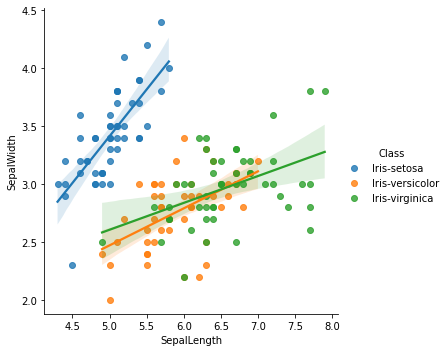

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lmplot(data = df, 
            x = 'SepalLength', 
            y = 'SepalWidth',
            hue = 'Class')

plt.show()

## Hypothesis Testing

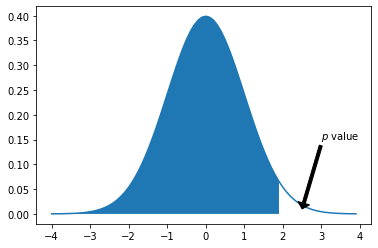

In [ ]:
from scipy import stats

x = [x for x in np.arange(-4,4,.1)]
x_trunk = [i for i in x if i<2]

plt.plot(x, stats.norm.pdf(x, 0, 1))
plt.fill_between(x_trunk, 0, stats.norm.pdf(x_trunk,0,1))
plt.annotate(r'$p$ value', xy = [2.5,.01],
            xytext = [3,.15],
            arrowprops = dict(facecolor = 'black', width = 3, headwidth = 12, headlength = 6))
plt.show()


## Your Turn

1. Explain the difference between standard error and confidence intervals.
2. Use the workout data and graph the average calories by workout type and include the 95% confidence interval.